# Kollokasjoner for nøkkelord

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [2]:
css()

In [3]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [4]:
import pandas as pd

In [5]:
import ast

In [6]:
#colls_before = pd.read_json('demokrati_before.json')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [9]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [10]:
reference = pd.read_json('avis_agg_sample_20.json')

In [11]:
keyword = 'irritasjon'

In [62]:
filename = 'collocation_' + keyword + ".csv"

## Grafstruktur topos

In [12]:
keyword_graph = nb.make_graph(keyword, cutoff=16)

In [13]:
comm = gnl.community_dict(keyword_graph)

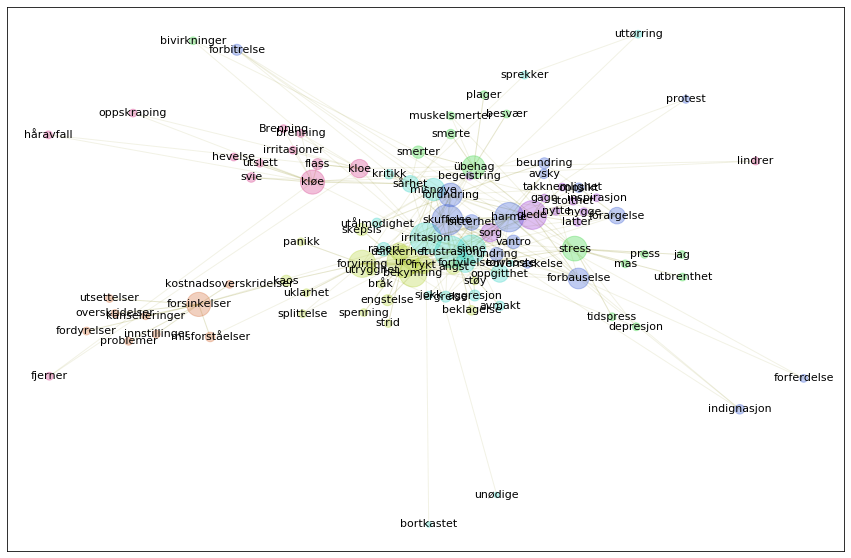

In [14]:
gnl.show_graph(keyword_graph, spread=0.8, fontsize=11)

In [15]:
keyword_cliques = cliques(keyword_graph)

# Grafens klikkstruktur (klikk = clique)

Klikkstrukturen er fin for å se overlapp og forskjellige kontekster hvor nøkkelordet forekommer. 

In [16]:
for i in keyword_cliques:
    mu.printmd("<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ' ,'.join(i)))

<span style='font-size:1.1em'>oppsikt ,svie ,skuffelse ,irritasjon ,forundring ,forbauselse ,misnøye ,skepsis ,uro ,kløe ,begeistring ,stress ,ergrelse ,beklagelse ,bitterhet ,forferdelse ,utålmodighet ,angst ,avmakt ,splittelse ,muskelsmerter ,forbitrelse ,indignasjon ,avsky ,kloe ,støy ,bekymring ,übehag ,vantro ,aggresjon ,utrygghet ,glede ,fortvilelse ,sårhet ,beundring ,sorg ,frykt ,sinne ,raseri ,forargelse ,engstelse ,forvirring ,harme ,frustrasjon ,usikkerhet ,undring ,oppgitthet ,smerter</span>

<span style='font-size:1.1em'>übehag ,kløe ,sårhet ,irritasjon</span>

<span style='font-size:1.1em'>übehag ,stress ,irritasjon ,uro</span>

<span style='font-size:1.1em'>skuffelse ,irritasjon ,utrygghet ,glede ,forundring ,forbauselse ,fortvilelse ,misnøye ,uro ,sorg ,sinne ,ergrelse ,bitterhet ,raseri ,forargelse ,utålmodighet ,forvirring ,harme ,forbitrelse ,frustrasjon ,usikkerhet ,indignasjon ,undring ,oppgitthet ,bekymring</span>

<span style='font-size:1.1em'>skuffelse ,irritasjon ,glede ,fortvilelse ,forbauselse ,forundring ,misnøye ,uro ,sinne ,bitterhet ,raseri ,harme ,frustrasjon ,undring ,oppgitthet ,bekymring</span>

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [17]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### uro-bekymring
<span style='font-size:1.1em'>uro, bekymring, forvirring, usikkerhet, frykt, angst, skepsis, utrygghet, kaos, engstelse, beklagelse, panikk, uklarhet, splittelse, spenning, støy, strid, bråk</span>
### stress-übehag
<span style='font-size:1.1em'>stress, übehag, smerter, smerte, depresjon, mas, besvær, utbrenthet, tidspress, muskelsmerter, plager, bivirkninger, press, jag</span>
### frustrasjon-irritasjon
<span style='font-size:1.1em'>frustrasjon, irritasjon, sinne, misnøye, fortvilelse, oppgitthet, sårhet, raseri, ergrelse, aggresjon, utålmodighet, avmakt, kritikk, sprekker, uttørring, sjokk, unødige, tørrhoste, bortkastet</span>
### skuffelse-harme
<span style='font-size:1.1em'>skuffelse, harme, forundring, forbauselse, forargelse, bitterhet, vantro, undring, beundring, forbitrelse, oppsikt, indignasjon, avsky, overraskelse, protest, forferdelse</span>
### glede-sorg
<span style='font-size:1.1em'>glede, sorg, latter, takknemlighet, nytte, gagn, stolthet, begeistring, hygge, inspirasjon</span>
### kløe-kloe
<span style='font-size:1.1em'>kløe, kloe, flass, svie, Brenning, utslett, hevelse, irritasjoner, lindrer, håravfall, oppskraping, brenning, fjerner</span>
### forsinkelser-misforståelser
<span style='font-size:1.1em'>forsinkelser, misforståelser, kostnadsoverskridelser, fordyrelser, problemer, innstillinger, kanselleringer, overskridelser, utsettelser</span>


# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


Her ser vi først på referansekorpuset, og validerer det. Det er gruppert på tiår.

In [18]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title=word);

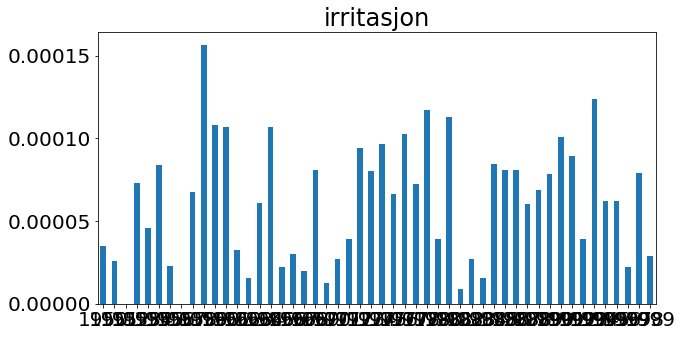

In [19]:
barchart(keyword, reference);

In [20]:
from time import time

collocations = dict()
step = 1

for i in range(1950, 2000):
    print(i)
    t0 = time()
    try:
        collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
    except:
        try:
            collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
        except:
            print("gir opp", i)
    print((time() - t0)/60, "minutter")

1950
0.17504801750183105 minutter
1951
0.12260657946268717 minutter
1952
0.15474781195322673 minutter
1953
0.17991580168406168 minutter
1954
0.2039881149927775 minutter
1955
0.19418774445851644 minutter
1956
0.15848542451858522 minutter
1957
0.17728949785232545 minutter
1958
0.20411360661188763 minutter
1959
0.24349424839019776 minutter
1960
0.2587767799695333 minutter
1961
0.30986847082773844 minutter
1962
0.3188302119572957 minutter
1963
0.3402560432751974 minutter
1964
0.26769957145055134 minutter
1965
0.2888646046320597 minutter
1966
0.2626102010409037 minutter
1967
0.2746835112571716 minutter
1968
0.2534401655197144 minutter
1969
0.26807395219802854 minutter
1970
0.21527158816655476 minutter
1971
0.21239486535390217 minutter
1972
0.24174152612686156 minutter
1973
0.2617134650548299 minutter
1974
0.28312766551971436 minutter
1975
0.25932424068450927 minutter
1976
0.2839971542358398 minutter
1977
0.29633157650629677 minutter
1978
0.2839828292528788 minutter
1979
0.2662838300069173 m

In [21]:
colls = nb.frame(collocations)

In [22]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [23]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [24]:
agg = group_frames(colls)

In [25]:
nb.normalize_corpus_dataframe(agg)

True


# Opptelling

# Sammenligner med en referanse


In [26]:
reference.sort_values(by=reference.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
.,1.39098,1.39011,1.32974,1.31876,1.31522,1.33115,1.32032,1.28226,1.31114,1.27826,1.22015,1.17079,1.23745,1.29461,1.28554,1.25099,1.2219,1.38504,1.24515,1.33251,1.29176,1.31627,1.22451,1.27574,1.24207,1.25917,1.21733,1.1969,1.21583,1.18739,1.29005,1.22005,1.24174,1.25352,1.30283,1.23567,1.3153,1.36488,1.40242,1.3226,1.35333,1.39079,1.41228,1.39136,1.29477,1.33864,1.28848,1.37039,1.23171,1.41384
",",0.76954,0.856414,0.795358,0.881156,0.806442,0.743545,0.837655,0.742889,0.754299,0.87736,0.786793,0.820144,0.748338,0.786501,0.871437,0.87292,0.836479,1.0084,0.7684,0.839177,0.735266,0.729174,0.686146,0.724146,0.737229,0.71974,0.718431,0.71361,0.667856,0.701938,0.769266,0.702013,0.738465,0.742419,0.720979,0.725155,0.80166,0.77114,0.787629,0.672002,0.640604,0.717421,0.785378,0.77462,0.758297,0.747596,0.740608,0.754163,0.731341,0.706799
i,0.448572,0.490718,0.494876,0.505146,0.495696,0.493653,0.501771,0.561204,0.493934,0.468949,0.520136,0.499579,0.500054,0.493851,0.517313,0.497924,0.500399,0.485552,0.496983,0.497255,0.494801,0.503126,0.50562,0.477942,0.492472,0.470903,0.490651,0.453728,0.479439,0.459831,0.461423,0.477404,0.446913,0.464701,0.445798,0.449428,0.410621,0.437679,0.411688,0.438477,0.440603,0.437625,0.396097,0.399638,0.407435,0.409982,0.426179,0.419586,0.406545,0.39061
og,0.383426,0.464821,0.411131,0.463728,0.430163,0.479666,0.392801,0.386091,0.413687,0.394402,0.425193,0.435716,0.444428,0.438936,0.442386,0.418031,0.439723,0.395065,0.414101,0.424339,0.344844,0.364508,0.398127,0.367014,0.37332,0.356991,0.412768,0.355218,0.400409,0.374849,0.3646,0.365743,0.36416,0.405785,0.403822,0.385317,0.373198,0.377977,0.33959,0.348051,0.322756,0.288004,0.348158,0.348168,0.298878,0.303044,0.343276,0.342268,0.354872,0.32353
er,0.218263,0.244129,0.227565,0.237595,0.235194,0.25221,0.22493,0.22228,0.234139,0.211662,0.23289,0.224294,0.225517,0.224779,0.216897,0.217586,0.217856,0.209655,0.213175,0.206154,0.19566,0.198908,0.221664,0.212436,0.228091,0.211505,0.222451,0.220346,0.226186,0.210243,0.219563,0.223764,0.211004,0.229611,0.217844,0.210852,0.206027,0.228521,0.193161,0.20312,0.20104,0.21487,0.190787,0.203987,0.202966,0.201665,0.191281,0.20129,0.206863,0.188951
det,0.211415,0.241213,0.227533,0.229656,0.23466,0.255584,0.217595,0.209046,0.230751,0.205705,0.234179,0.222644,0.232854,0.21727,0.206074,0.210301,0.225333,0.179355,0.202696,0.181327,0.175721,0.176576,0.195948,0.195361,0.202018,0.188615,0.208865,0.191718,0.194573,0.184479,0.194055,0.18228,0.176611,0.193236,0.172973,0.162115,0.166243,0.171335,0.147281,0.153739,0.153724,0.159661,0.134479,0.146996,0.13992,0.1407,0.126959,0.134905,0.145275,0.132223
til,0.211294,0.246022,0.225881,0.250039,0.228036,0.246956,0.230689,0.230958,0.23702,0.215457,0.243444,0.230365,0.251778,0.230768,0.230874,0.214544,0.228794,0.204417,0.224576,0.208807,0.221851,0.204496,0.217234,0.22028,0.226254,0.221014,0.222756,0.212368,0.21053,0.212503,0.225126,0.221852,0.21734,0.225401,0.21404,0.200512,0.19886,0.198167,0.177525,0.19539,0.187288,0.193843,0.180282,0.173306,0.176025,0.175332,0.181045,0.175954,0.177338,0.171895
av,0.185768,0.210382,0.19872,0.210461,0.197723,0.199487,0.200058,0.182342,0.192366,0.189662,0.200122,0.186039,0.190749,0.198935,0.20195,0.197942,0.201319,0.186709,0.197593,0.181895,0.18721,0.183224,0.190604,0.181473,0.183229,0.183522,0.177917,0.185628,0.180499,0.171443,0.172337,0.1697,0.165983,0.171711,0.168311,0.161372,0.158221,0.166031,0.144714,0.149101,0.14809,0.150793,0.142778,0.141303,0.13673,0.137954,0.128789,0.131942,0.142408,0.132305
som,0.184538,0.216867,0.196289,0.218786,0.204427,0.217225,0.205257,0.193064,0.207225,0.193287,0.221764,0.2004,0.212438,0.206862,0.203928,0.215046,0.209196,0.18701,0.198748,0.181824,0.187924,0.18537,0.194704,0.188052,0.197147,0.

In [27]:
agg.sort_values(by=agg.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0502489,0.0503425,0.0490751,0.0508627,0.0536198
",",0.0365505,0.033247,0.0332415,0.0321735,0.0334787
og,0.0336536,0.0371422,0.0331428,0.0308267,0.030043
i,0.0226381,0.023115,0.0245795,0.0283321,0.0276808
til,0.0127476,0.0144448,0.0181802,0.0178433,0.0200173
som,0.0174216,0.0169924,0.0164591,0.0149269,0.0143679
er,0.0153559,0.0139743,0.0158396,0.0156219,0.015392
det,0.0167894,0.0140355,0.0155492,0.0161754,0.0140462
at,0.0129119,0.0129886,0.0147321,0.0147664,0.0129803
har,0.0111548,0.0124568,0.0142652,0.01578,0.0138017


In [28]:
pmi = pd.DataFrame()
for i in agg:
    pmi[i] = agg[i]**1.02/(pd.concat([agg[i], reference[i]],axis=1).sum(axis=1))

In [29]:
nb.normalize_corpus_dataframe(pmi)

True

<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [30]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
sårhet,0.000114029,7.58705e-05,7.72533e-05,4.19428e-05,4.17229e-05
Bali,0.000114021,7.5057e-05,0,0,0
unødige,0.000113012,7.11168e-05,4.7044e-05,5.749e-05,2.71152e-05
protesen,0.000112921,7.0218e-05,0,0,0
beskytter,0.000112895,5.78851e-05,5.41337e-05,2.3314e-05,6.96871e-06
bivirkninger,0.000112593,7.06808e-05,0,1.23435e-05,4.28959e-05
varmevirkning,0.000112578,7.0939e-05,0,0,0
STOMAFIX,0.000112531,7.02939e-05,7.17061e-05,0,0
dreper,0.0001123,6.96127e-05,6.28365e-06,2.70375e-06,6.7161e-06
tannprotesen,0.000111859,0,0,0,0


In [31]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
sårhet,0.000114029,7.58705e-05,7.72533e-05,4.19428e-05,4.17229e-05
Bali,0.000114021,7.5057e-05,0,0,0
unødige,0.000113012,7.11168e-05,4.7044e-05,5.749e-05,2.71152e-05
protesen,0.000112921,7.0218e-05,0,0,0
beskytter,0.000112895,5.78851e-05,5.41337e-05,2.3314e-05,6.96871e-06
bivirkninger,0.000112593,7.06808e-05,0,1.23435e-05,4.28959e-05
varmevirkning,0.000112578,7.0939e-05,0,0,0
STOMAFIX,0.000112531,7.02939e-05,7.17061e-05,0,0
dreper,0.0001123,6.96127e-05,6.28365e-06,2.70375e-06,6.7161e-06
tannprotesen,0.000111859,0,0,0,0


In [32]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
sårhet,0.000114029,7.58705e-05,7.72533e-05,4.19428e-05,4.17229e-05
Bali,0.000114021,7.5057e-05,0,0,0
Silikon,0.000107569,7.45244e-05,7.68039e-05,0,0
Expigen,0,7.44059e-05,0,0,0
AFI,0.000108296,7.41852e-05,7.55925e-05,0,0
sart,0.000107839,7.41531e-05,7.15699e-05,5.47027e-05,3.98451e-05
übehagelig,8.40313e-05,7.41314e-05,4.19702e-05,2.81023e-05,8.57327e-06
SILULEN,0.000107708,7.41094e-05,7.61712e-05,5.78217e-05,0
mykere,6.01465e-05,7.4e-05,7.08903e-05,5.13091e-06,8.40437e-06
Azulen,0.000105942,7.3982e-05,7.66477e-05,0,0


In [33]:
pmi.sort_values(by=pmi.columns[2], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
kløe,0.000107262,6.84419e-05,7.80315e-05,5.978e-05,4.41605e-05
übehag,4.94442e-05,5.9987e-05,7.7825e-05,5.78217e-05,4.33277e-05
ergrelse,0.000106962,6.90838e-05,7.78119e-05,6.00727e-05,4.36164e-05
porene,0.000104162,0,7.77452e-05,0,0
Saltrates,3.35868e-05,7.10307e-05,7.76467e-05,5.73901e-05,4.04013e-05
kloe,0,0,7.73956e-05,5.82925e-05,2.09989e-05
sårhet,0.000114029,7.58705e-05,7.72533e-05,4.19428e-05,4.17229e-05
unodig,8.81257e-05,7.12372e-05,7.70761e-05,3.21588e-05,4.21169e-05
FOTBALSAM,0,0,7.69e-05,5.66985e-05,0
barnehud,0,0,7.68527e-05,5.47027e-05,3.98451e-05


In [34]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
frustrasjon,0,6.6274e-05,7.59306e-05,6.04594e-05,3.83087e-05
Irritasjon,7.35557e-05,6.98659e-05,7.21732e-05,6.04025e-05,4.41236e-05
luftveiene,0,7.34346e-05,7.65044e-05,6.02677e-05,4.40739e-05
ergrelse,0.000106962,6.90838e-05,7.78119e-05,6.00727e-05,4.36164e-05
kløe,0.000107262,6.84419e-05,7.80315e-05,5.978e-05,4.41605e-05
tærne,0.000107421,1.27377e-05,7.646e-05,5.97572e-05,4.4582e-06
kilde,0.000102147,6.24959e-05,7.47475e-05,5.92886e-05,3.80558e-05
tørrhoste,0,0,0,5.9201e-05,0
slimhinner,0.000104162,6.97625e-05,7.58866e-05,5.91307e-05,4.36716e-05
insektstikk,0,0,0,5.90035e-05,0


In [35]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
luftveier,0,7.07363e-05,5.60666e-05,5.78217e-05,4.46046e-05
seigt,0,0,0,5.66985e-05,4.44683e-05
sekret,0,6.71991e-05,0,0,4.44535e-05
kløe,0.000107262,6.84419e-05,7.80315e-05,5.978e-05,4.41605e-05
1.4.93,0,0,0,0,4.41343e-05
Irritasjon,7.35557e-05,6.98659e-05,7.21732e-05,6.04025e-05,4.41236e-05
luftveiene,0,7.34346e-05,7.65044e-05,6.02677e-05,4.40739e-05
slimhinner,0.000104162,6.97625e-05,7.58866e-05,5.91307e-05,4.36716e-05
ergrelse,0.000106962,6.90838e-05,7.78119e-05,6.00727e-05,4.36164e-05
lOOml,0,0,0,0,4.35973e-05


<br>
<br>

In [63]:
pmi.to_csv(filename)

# Assosiasjoner og variasjon over år.

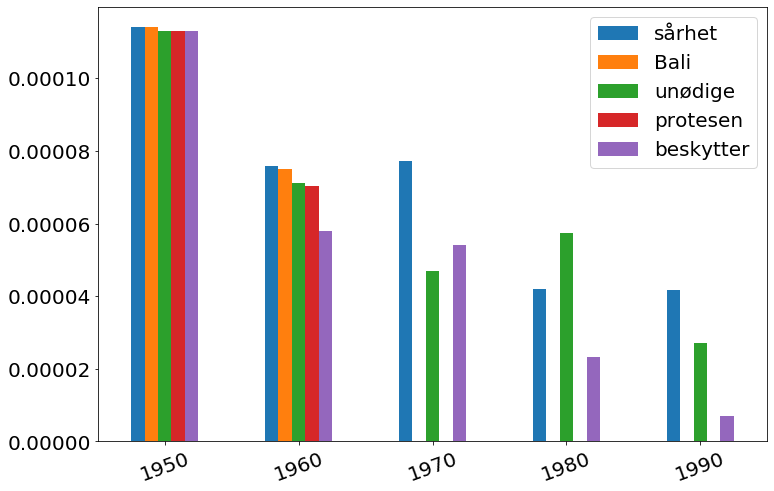

In [37]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [38]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

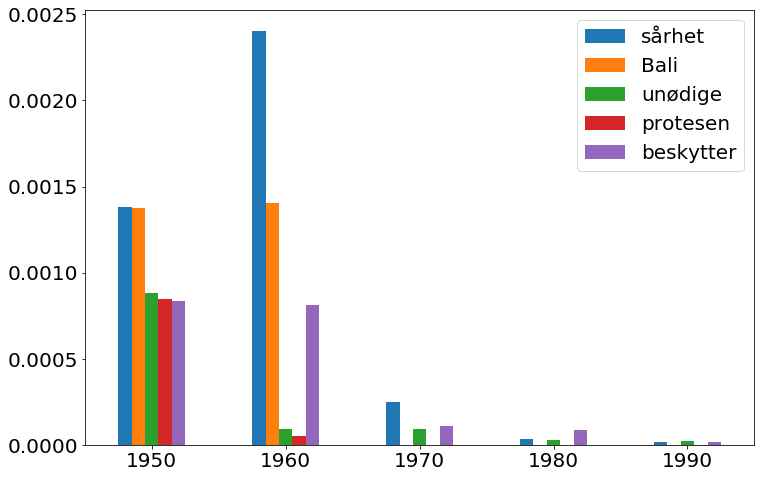

In [39]:
freq_assoc_val(agg, pmi, 0)

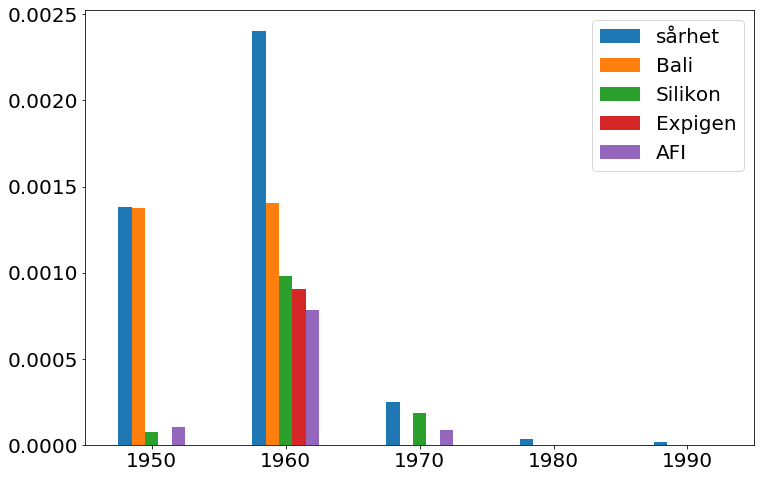

In [40]:
freq_assoc_val(agg, pmi, 1)

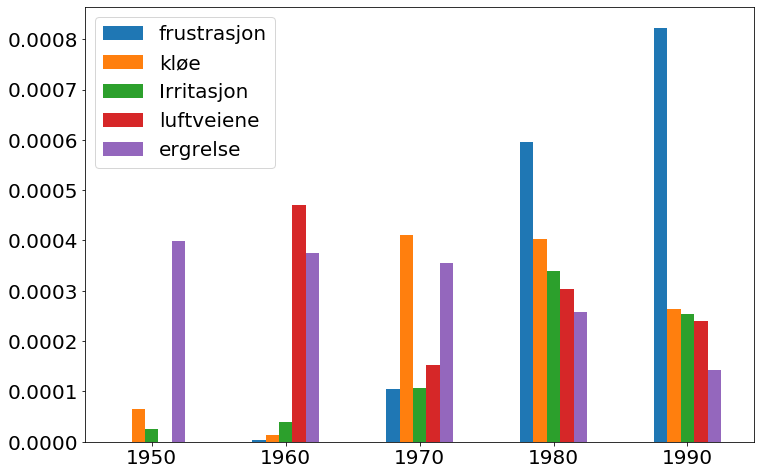

In [41]:
freq_assoc_val(agg, pmi, 3)

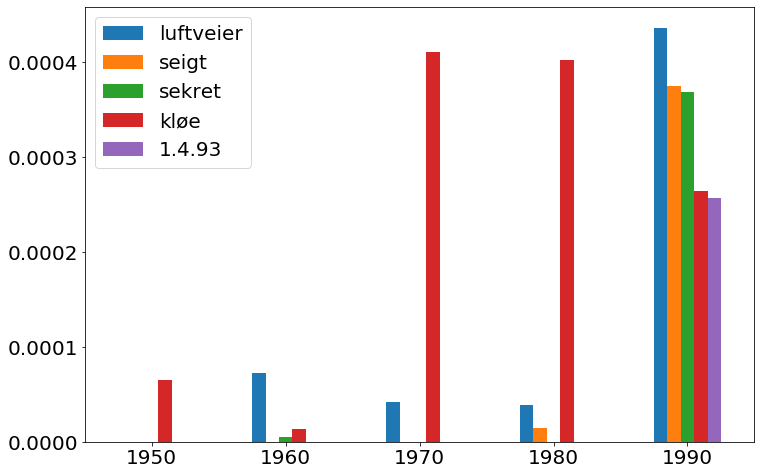

In [42]:
freq_assoc_val(agg, pmi, 4)

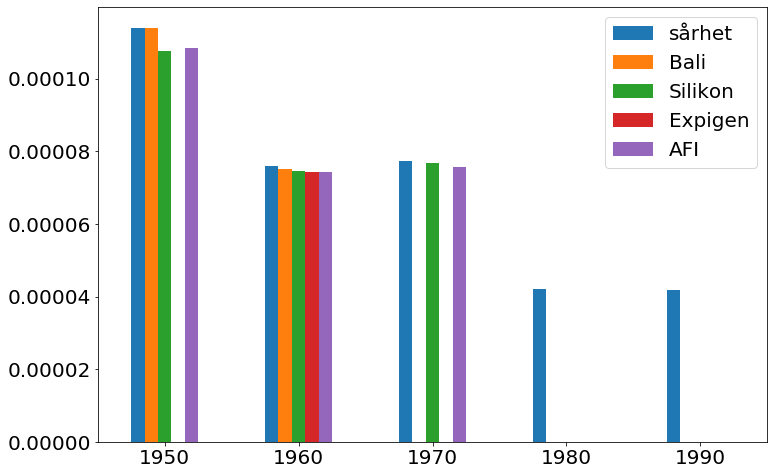

In [43]:
freq_assoc_val(pmi, pmi, 1)

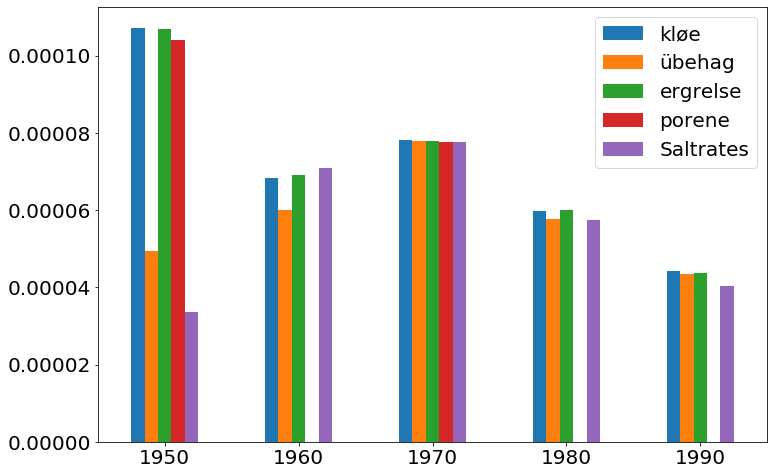

In [44]:
freq_assoc_val(pmi, pmi, 2)

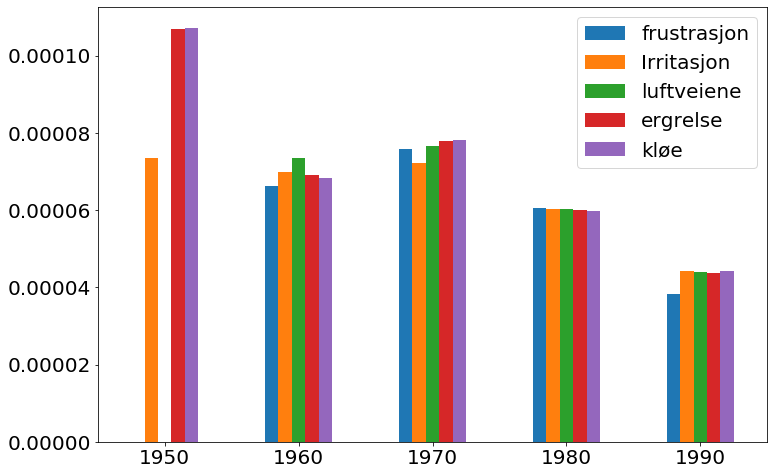

In [45]:
freq_assoc_val(pmi, pmi, 3)

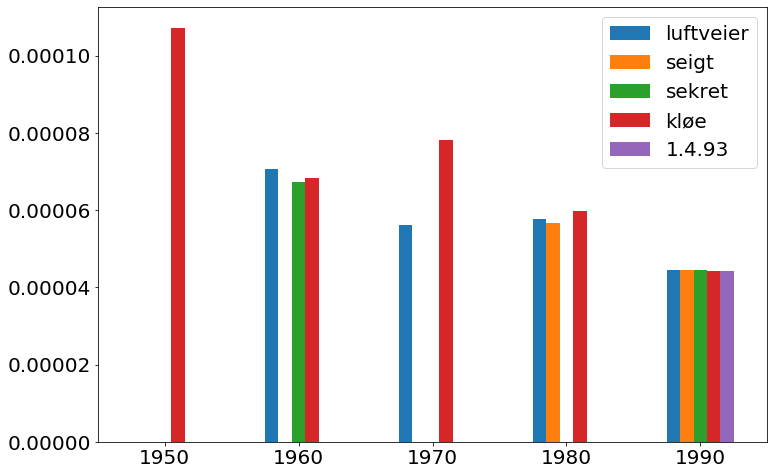

In [46]:
freq_assoc_val(pmi, pmi, 4)

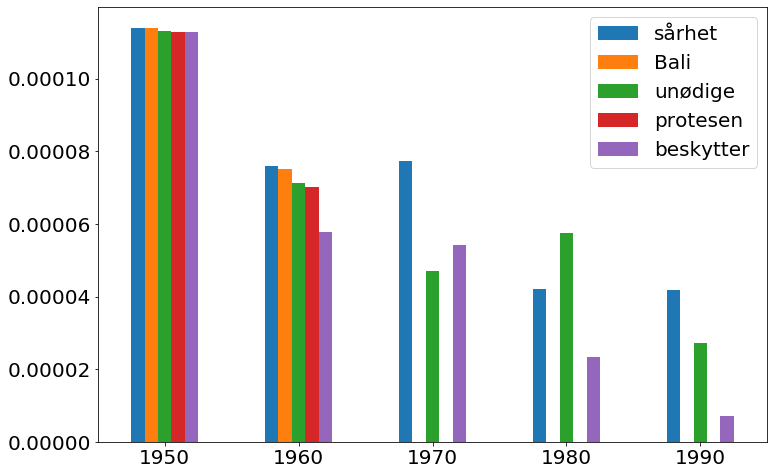

In [47]:
freq_assoc_val(pmi, pmi, 0)

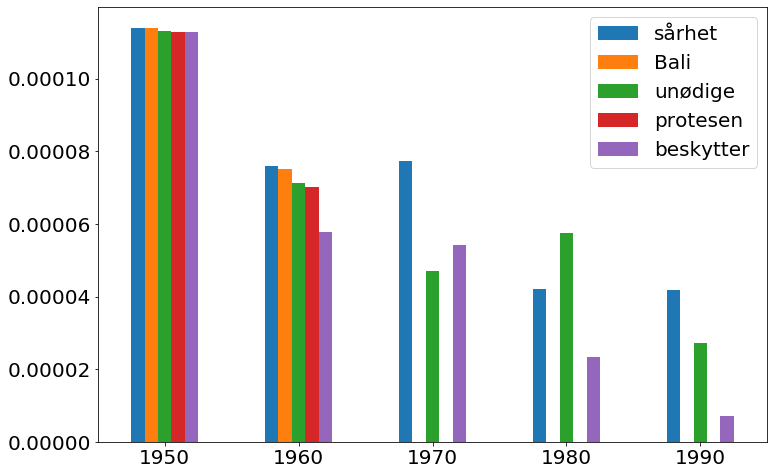

In [48]:
freq_assoc_val(pmi, pmi, 0)

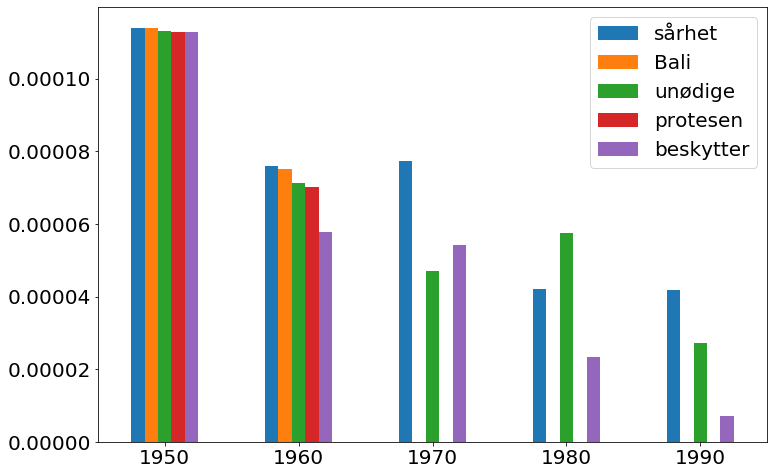

In [49]:
freq_assoc_val(pmi, pmi, 0)

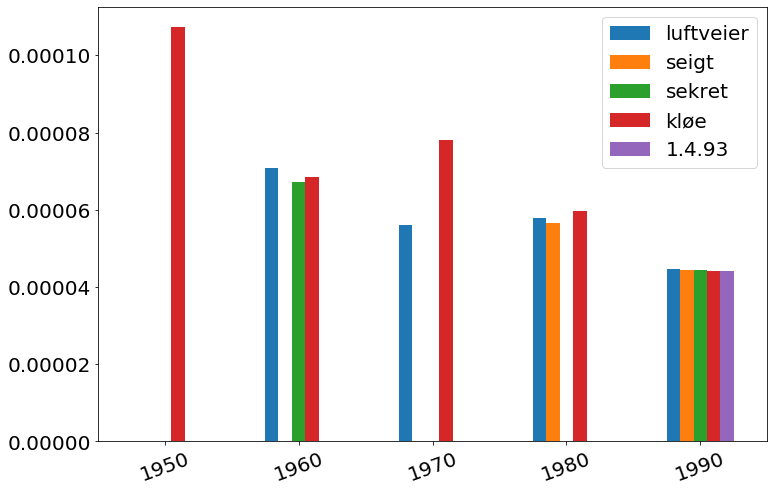

In [50]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

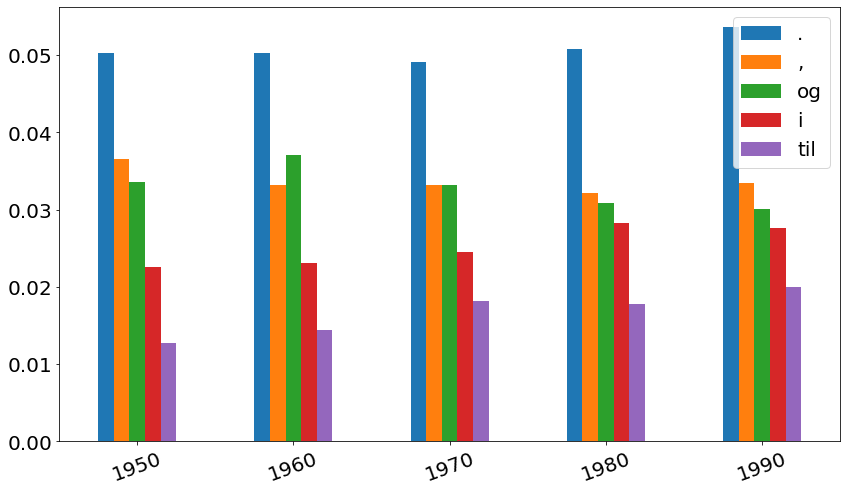

In [51]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden sortert på ordklasser

In [52]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

## Benevnelser 
<span style='font-size:150%'>Saltrates, FOTBALSAM, Silikon, Fotbalsam, Azulen, Unngå, Vannavstotende, SILULEN, Carters, Ruts, Heisproblemer, Irritasjonen, AFI, TITRALAC, SAM, Merkverdig, Kissinger, Halsbrann, Desilén, FOTBAL-, Schindler, Reber, Tid, Nobo-systemet, Dasacall, AKP, Vannavstøtende, Vance, ReberSchindler, Begin, Hilseplikten</span>

## subst
<span style='font-size:1.1em'>kløe, ergrelse, porene, hodepine, huden, luftveiene, tærne, forundring, frustrasjon, slimhinner, forkjølelse, hjerteløshet, underskriften, betennelse, fotsvette, preparat, mellompartiene, søvnløshet, opphisselse, slimhinnen, araberne, kilde, forbikjøringer, bylten, totter</span>
## unknown
<span style='font-size:1.1em'>übehag, kloe, sårhet, unodig, barnehud, sarhet, dytting, klassekameratenes, lærerinnen, driftstans, surstoffholdige, motortrouble, inntrengning, oppgitthet, oppsamlet, kontorsystem, fotbalsam, beskyt-, innholds-, innholdsstoffer, manges, naboens, farts-stress, spa-, klubbhold, rhet, nybileieren, taerne, lelse, tobakksrøyk, ko-stress</span>
## verb
<span style='font-size:1.1em'>lindrer, irritert, fremkaller, harme, motvirkes, svelg, forårsake, ergrer, syndes</span>
## adj
<span style='font-size:1.1em'>uskyldige, utidig, reumatiske, vannavstøtende</span>


# Hvordan utvikler ordene seg?

In [53]:
barchart = lambda w, title='', df=pmi: df.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

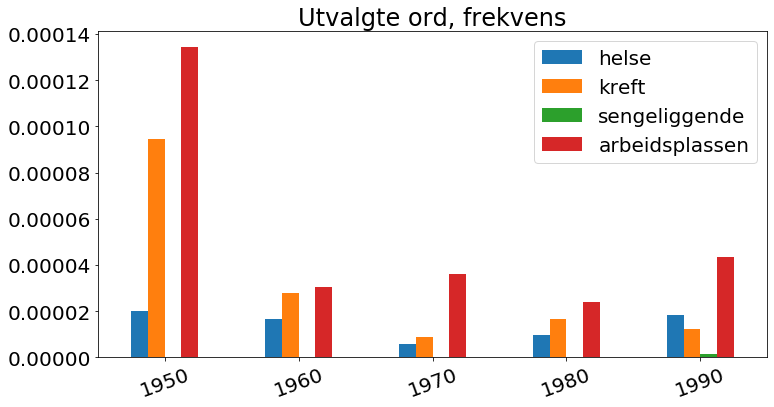

In [54]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, frekvens', df=agg);

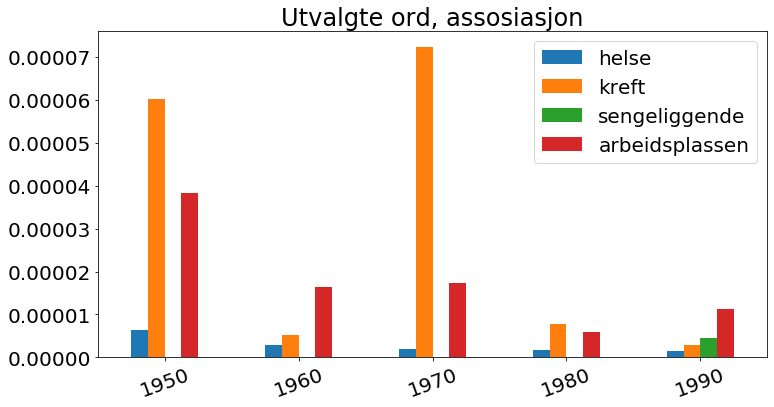

In [55]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, assosiasjon');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

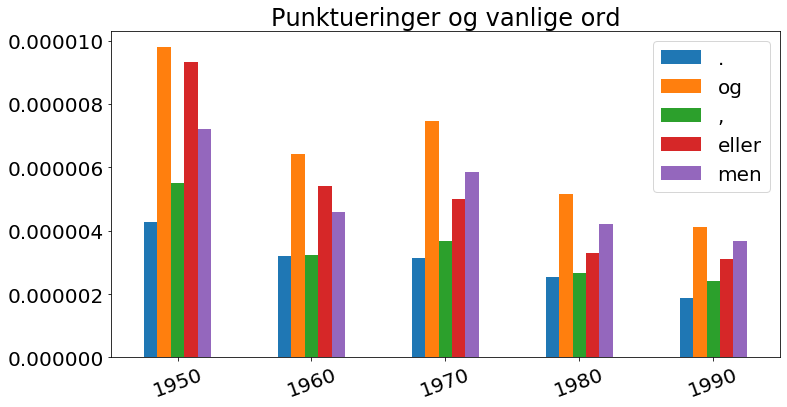

In [56]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', pmi);

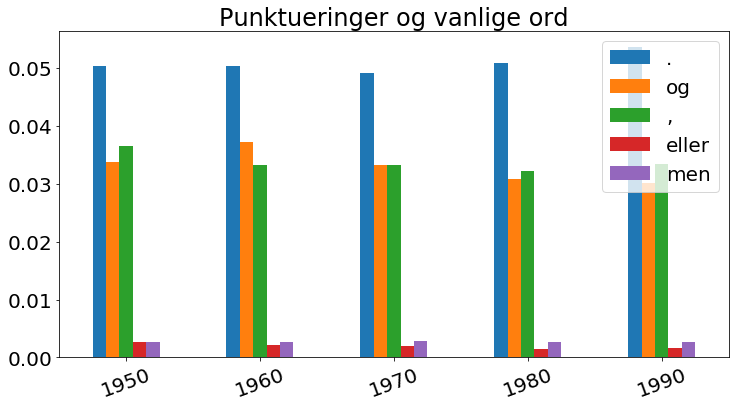

In [57]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', agg);

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [58]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

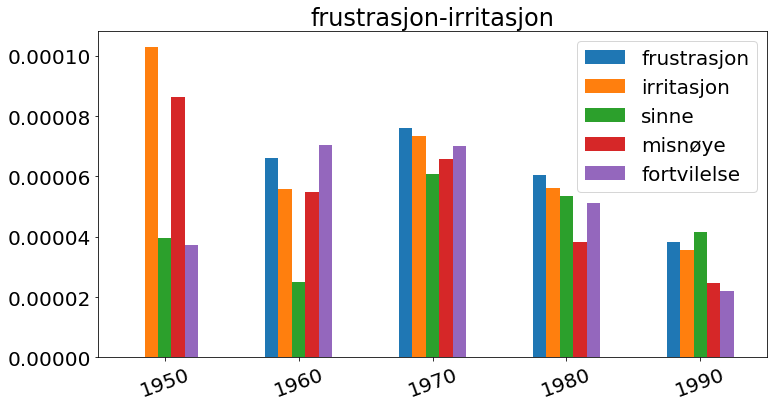

In [59]:
commchart(2, (0,5));

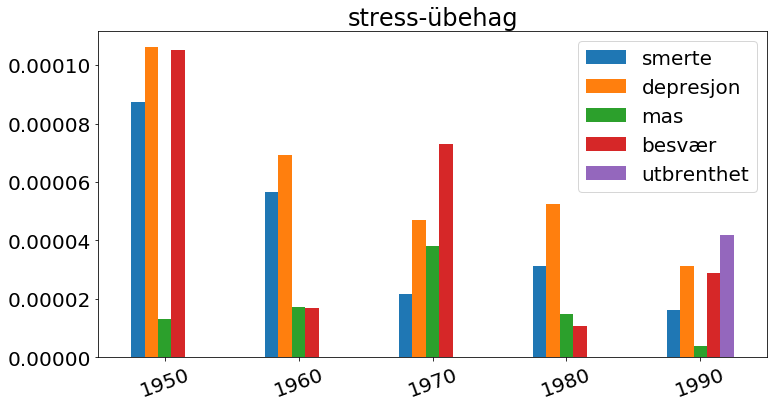

In [60]:
commchart(1, (3, 8))

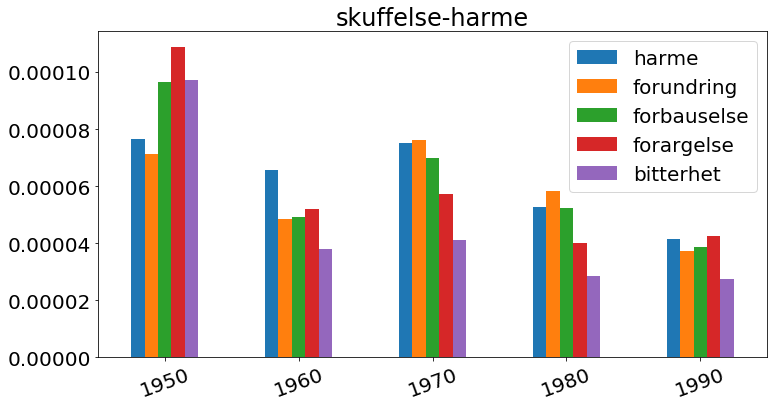

In [61]:
commchart(3)